In [ ]:
#surpress warnings:

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
#import the required libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [ ]:
#load the csv and use the method head to display the first 5 columns of the dataframe:

In [4]:
import pandas as pd

filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header=None)

print(df.head())

    0           1                2         3         4          5   \
0  NaN          id             date     price  bedrooms  bathrooms   
1  0.0  7129300520  20141013T000000  221900.0       3.0        1.0   
2  1.0  6414100192  20141209T000000  538000.0       3.0       2.25   
3  2.0  5631500400  20150225T000000  180000.0       2.0        1.0   
4  3.0  2487200875  20141209T000000  604000.0       4.0        3.0   

            6         7       8           9   ...     12          13  \
0  sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above   
1         1180      5650     1.0           0  ...      7        1180   
2         2570      7242     2.0           0  ...      7        2170   
3          770     10000     1.0           0  ...      6         770   
4         1960      5000     1.0           0  ...      7        1050   

              14        15            16       17                  18  \
0  sqft_basement  yr_built  yr_renovated  zipcode                 lat   


In [ ]:
#display column names

In [6]:
print(df.columns)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21],
      dtype='int64')


In [ ]:
#rearrage the column names correctly and print them

In [7]:
column_names = [
    "id", "date", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
    "floors", "waterfront", "view", "condition", "grade", "sqft_above",
    "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long",
    "sqft_living15", "sqft_lot15"
]
df = pd.read_csv(filepath, skiprows=1, header=None, names=column_names)
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
#display the data types of each column

In [8]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
#obtain a statistical summary of the dataframe.

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop()
#then use the method describe() to obtain a statistical summary of the data

In [10]:
df.drop(columns=["id"], axis=1, inplace=True)
summary = df.describe()
print(summary)

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [11]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [ ]:
#replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace()

In [12]:
import numpy as np
mean_bedrooms = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean_bedrooms, inplace=True)

In [13]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [14]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [ ]:
#Use the method value_counts to count the number of houses with unique floor values,
#use the method .to_frame() to convert it to a data frame

In [15]:
floor_counts = df['floors'].value_counts()
floor_counts_df = floor_counts.to_frame()
floor_counts_df.columns = ['count']
print(floor_counts_df)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


In [ ]:
#Use the function boxplot in the seaborn library 
#to determine whether houses with a waterfront view or without a waterfront view have more price outliers

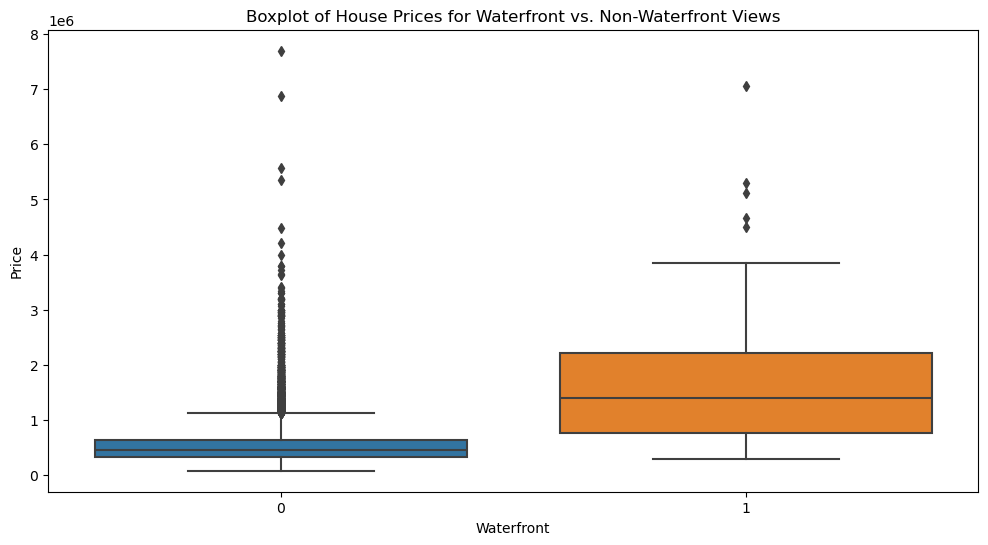

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Boxplot of House Prices for Waterfront vs. Non-Waterfront Views')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()

In [ ]:
#Use the function regplot in the seaborn library 
#to determine if the feature sqft_above is negatively or positively correlated with price.

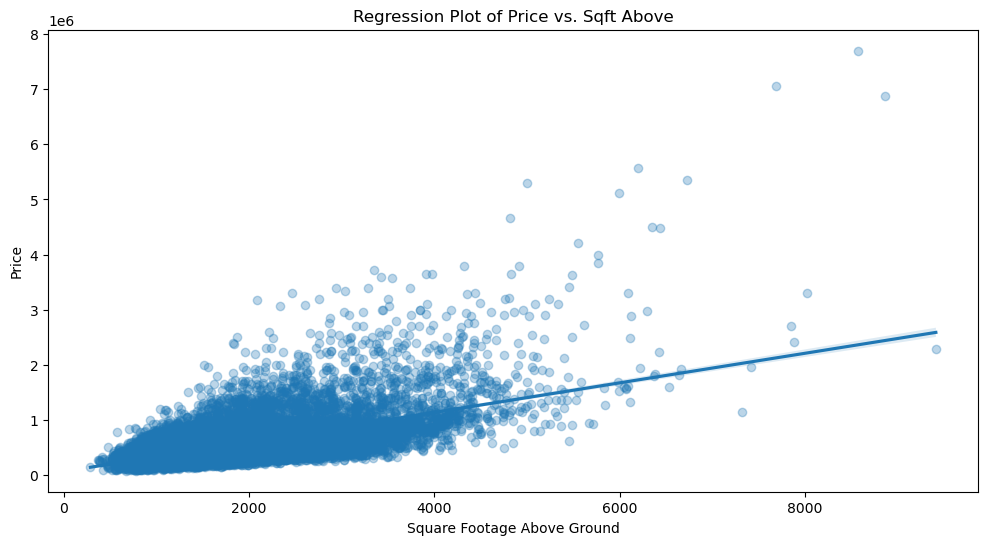

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={'alpha':0.3})
plt.title('Regression Plot of Price vs. Sqft Above')
plt.xlabel('Square Footage Above Ground')
plt.ylabel('Price')
plt.show()

In [ ]:
#use the Pandas method corr() to find the feature other than price that is most correlated with price

In [18]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
price_corr = corr_matrix['price'].sort_values()
print(price_corr)

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


In [ ]:
#fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [19]:
from sklearn.linear_model import LinearRegression
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149029567

In [ ]:
#fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.

In [20]:
from sklearn.metrics import r2_score
X = df[['sqft_living']]
y = df['price']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print("R^2 score:", r2)

R^2 score: 0.4928532179037931


In [ ]:
#fit a linear regression model to predict the 'price' using the list of features:
#then calculate the R^2.

In [21]:
from sklearn.metrics import r2_score
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms",
            "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print("R^2 score:", r2)

R^2 score: 0.6576951666037498


In [ ]:
#create a list of tuples, the first element in the tuple contains the name of the estimator:

        'scale'
        
        'polynomial'
        
        'model'

#the second element in the tuple contains the model constructor

        StandardScaler()
            
        PolynomialFeatures(include_bias=False)
            
        LinearRegression()

In [22]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create a list of tuples
estimators = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

print(estimators)

[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]


In [23]:
[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')),
 ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None))]


[('scale', StandardScaler()),
 ('polynomial', PolynomialFeatures(include_bias=False)),
 ('model', LinearRegression())]

In [ ]:
#use the list to create a pipeline object to predict the 'price', 
#fit the object using the features in the list features, and calculate the R^2

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
pipeline = Pipeline(estimators)
X = df[features]
y = df['price']
pipeline.fit(X, y)
y_pred = pipeline.predict(X)
r2 = r2_score(y, y_pred)
print("R^2 score:", r2)

R^2 score: 0.751339641572321


In [ ]:
#import the necessary modules:

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [ ]:
#split the data into training and testing sets:

In [26]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [ ]:
#create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, 
#and calculate the R^2 using the test data

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Create and fit Ridge regression object with regularization parameter 0.1
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate R^2 score using the test data
r2 = r2_score(y_test, y_pred)
print("R^2 score using Ridge regression:", r2)


R^2 score using Ridge regression: 0.6613982983090939


In [ ]:
#perform a second order polynomial transform on both the training data and testing data. 
#create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, 
#and calculate the R^2 utilising the test data provided

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)

y_pred = ridge.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
print("R^2 score using Ridge regression with polynomial features:", r2)

R^2 score using Ridge regression with polynomial features: 0.7000720073568305
